# Adaptive Optics Simulation using PyTomo

This notebook demonstrates how to build a tomographic reconstructor in phase space using PyTomo. It includes:
- Loading configuration parameters from an INI file
- Creating an AO system
- Constructing a reconstructor using the tomoReconstructor class
- Updating the modified filtered subaperture mask and recalculating the reconstructor

In [1]:
import matplotlib.pyplot as plt

In [2]:
import tomoAO



     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [3]:
ao_mode = "MLAO"

config_dir = "/home/joaomonteiro/Desktop/test_pytomo/"
config_file = "config.ini"

# Loading the config
config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode, config_dir=config_dir)


## Creating the Adaptive Optics System
Using the loaded configuration, we instantiate an AO system

In [4]:
aoSys = tomoAO.Simulation.AOSystem(config_vars)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% TELESCOPE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     Diameter            13.5              [m]        
    Resolution           288             [pixels]     
    Pixel Size           0.05              [m]        
     Surface            135.0              [m2]       
Central Obstruction      23.56        [% of diameter]  
Pixels in the pupil      61552            [pixels]     
  Field of View           0              [arcsec]     
      Source             None                         
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
No light propagated through the telescope
Warning!: A new pupil is now considered, its reflectivity is considered to be uniform. Assign the proper reflectivity map to tel.pupilReflectivity if required.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SOURCE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 Source Wavelength Zenith  Azimuth   Altitude Magnitude    Flux   
           [m]    [arcsec]  [deg]      [m]              [phot/m2/s]
-------

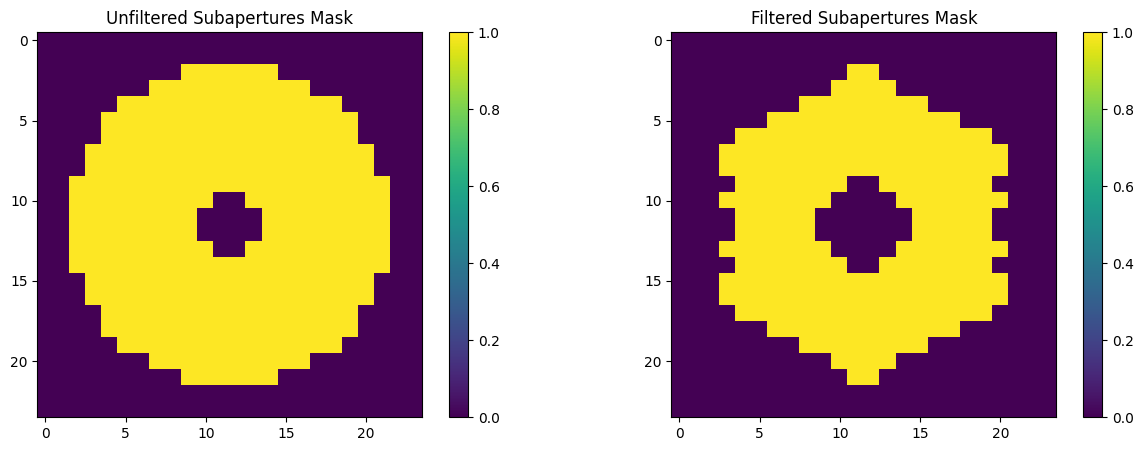

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

titles = ["Unfiltered Subapertures Mask", "Filtered Subapertures Mask"]
matrices = [aoSys.unfiltered_subap_mask, aoSys.filtered_subap_mask]

for ax, matrix, title in zip(axes.flat, matrices, titles):
    im = ax.imshow(matrix)
    ax.set_title(title)
    fig.colorbar(im, ax=ax)

## Building the Tomographic Reconstructor
We use the tomoReconstructor class to construct a reconstructor from scratch

In [6]:
from tomoAO.Reconstruction.reconClassType import tomoReconstructor

In [7]:
rec = tomoReconstructor(aoSys=aoSys, alpha=10, os=2)

GPU not available, using CPU
Building Gamma
Took 0.10353231430053711 seconds to build Gamma
Building the covariance matrices
Took 50.342671632766724 seconds to build the covariance matrices
Building the reconstructor
Took 4.74967098236084 seconds to build the reconstructor


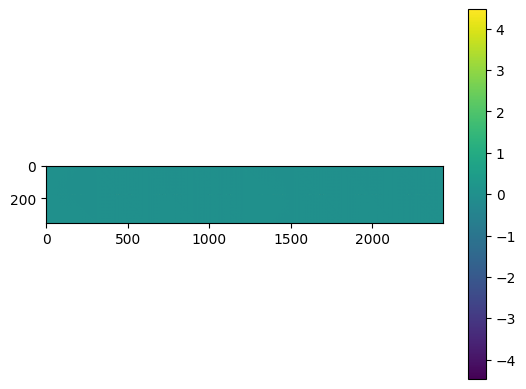

In [20]:
plt.imshow(rec.R_unfiltered)
plt.colorbar()
plt.show()

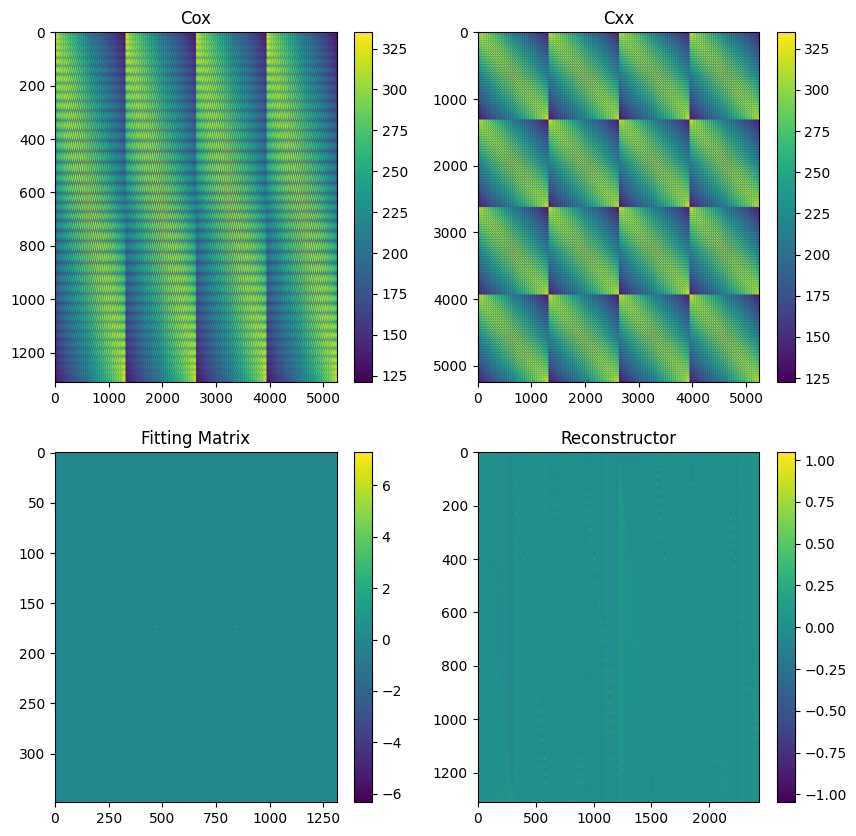

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

titles = ["Cox", "Cxx", "Fitting Matrix", "Reconstructor"]
matrices = [rec.Cox[0], rec.Cxx, rec.fittingMatrix, rec.Reconstructor[0]]

for ax, matrix, title in zip(axes.flat, matrices, titles):
    im = ax.imshow(matrix, cmap="viridis", aspect="auto")
    ax.set_title(title)
    fig.colorbar(im, ax=ax)

## Updating and Displaying the Modified Filtered Subaperture Mask
We modify the existing mask, recompute the reconstructor, and visualize the changes


In [ ]:
# Modify the filtered subaperture mask and recompute the reconstructor
# Example: Transpose the existing mask to introduce a different configuration
rec.filtered_subap_mask = aoSys.filtered_subap_mask.T
plt.imshow(rec.filtered_subap_mask)

In [ ]:
# Computing the new weight vector
# The weight vector can be user-defined by assigning a custom vector to `rec.weight_vector`
rec.computeDefaultWeightVector()

In [ ]:
#Computing the new noise covariance matrix
# The reconstructor noise covariance matrix can be user-defined by assigning a custom vector to `rec.noise_covariance_matrix`
rec.computeDefaultNoiseCovariance()

In [ ]:
rec.buildReconstructor()

# Building the reconstructor from function

In [4]:
from tomoAO.Reconstruction import tomographic_reconstructor_phase_space

### If the debug variable is not specified or is set to False, only the final reconstructor will be returned.


In [23]:
rec_fn = tomographic_reconstructor_phase_space(config_file=config_file,config_dir=config_dir,
                                               alpha=10)

GPU not available, using CPU
Building Gamma
Took 0.06834173202514648 seconds to build Gamma
Building the covariance matrices
Took 50.30727195739746 seconds to build the covariance matrices
Building the reconstructor
Took 7.5159385204315186 seconds to build the reconstructor


### If the debug variable is set to True, the entire object will be returned.


In [5]:
rec_fn_debug = tomographic_reconstructor_phase_space(config_file=config_file,config_dir=config_dir,
                                                     alpha=10, debug=True)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% TELESCOPE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     Diameter            13.5              [m]        
    Resolution           288             [pixels]     
    Pixel Size           0.05              [m]        
     Surface            135.0              [m2]       
Central Obstruction      23.56        [% of diameter]  
Pixels in the pupil      61552            [pixels]     
  Field of View           0              [arcsec]     
      Source             None                         
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
No light propagated through the telescope
Warning!: A new pupil is now considered, its reflectivity is considered to be uniform. Assign the proper reflectivity map to tel.pupilReflectivity if required.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SOURCE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 Source Wavelength Zenith  Azimuth   Altitude Magnitude    Flux   
           [m]    [arcsec]  [deg]      [m]              [phot/m2/s]
-------